## Analisis de estaciones meteorológicas en Canada

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Cargando los datos
datos = np.loadtxt('oef2.data')

# Normalizando los datos de las estaciones
datos = (datos - np.min(datos, axis=0)) / (np.max(datos, axis=0) - np.min(datos, axis=0))
print(datos.shape)

(35, 12)


Nombre de las estaciones

In [ ]:
estaciones = ["St. John_s", "Charlottetown", "Halifax", "Sydney", "Yarmouth", "Fredericton", "Arvida", "Montreal", "Quebec City", "Schefferville",
         "Sherbrooke", "Kapuskasing", "London", "Ottawa", "Thunder Bay", "Toronto", "Churchill", "The Pas", "Winnipeg", "Prince Albert",
         "Regina", "Beaverlodge", "Calgary", "Edmonton", "Kamloops", "Prince George", "Prince Rupert", "Vancouver", "Victoria", "Dawson",
         "Whitehorse", "Frobisher Bay", "Inuvik", "Resolute", "Yellowknife"
         ]

Primero vamos a graficar cada línea de cada estación para visualizar las temperaturas a traves de un año.

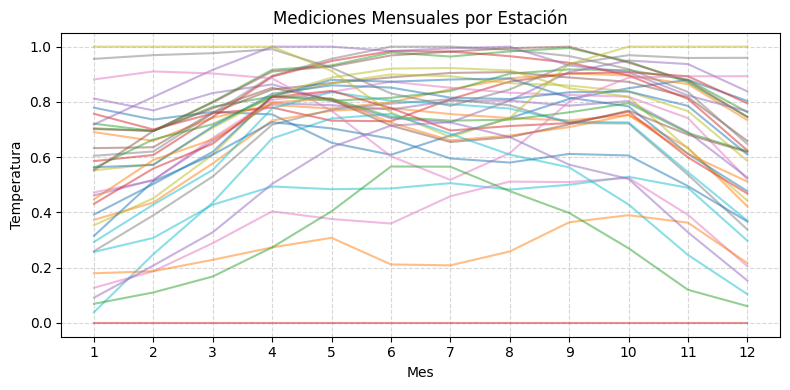

In [ ]:
meses = range(1, 13)
plt.figure(figsize=(8, 4))
for i in range(35):
    plt.plot(meses, datos[i], '-', label=f'Estación {i+1}', alpha=0.5)
plt.title('Mediciones Mensuales por Estación')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.grid(True)
plt.xticks(meses)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

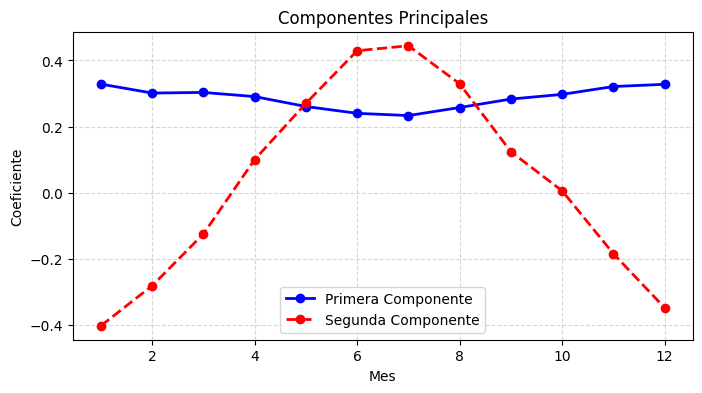

In [ ]:
# Realizar PCA de todos los datos de las estaciones
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datos)
loadings = pca.components_

# Figura del PCA
plt.figure(figsize=(8, 4))
plt.plot(meses, loadings[0], '-o', color='blue', label='Primera Componente', linewidth=2)
plt.plot(meses, loadings[1], '--o', color='red', label='Segunda Componente', linewidth=2)
plt.title('Componentes Principales')
plt.xlabel('Mes')
plt.ylabel('Coeficiente')
plt.grid(True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

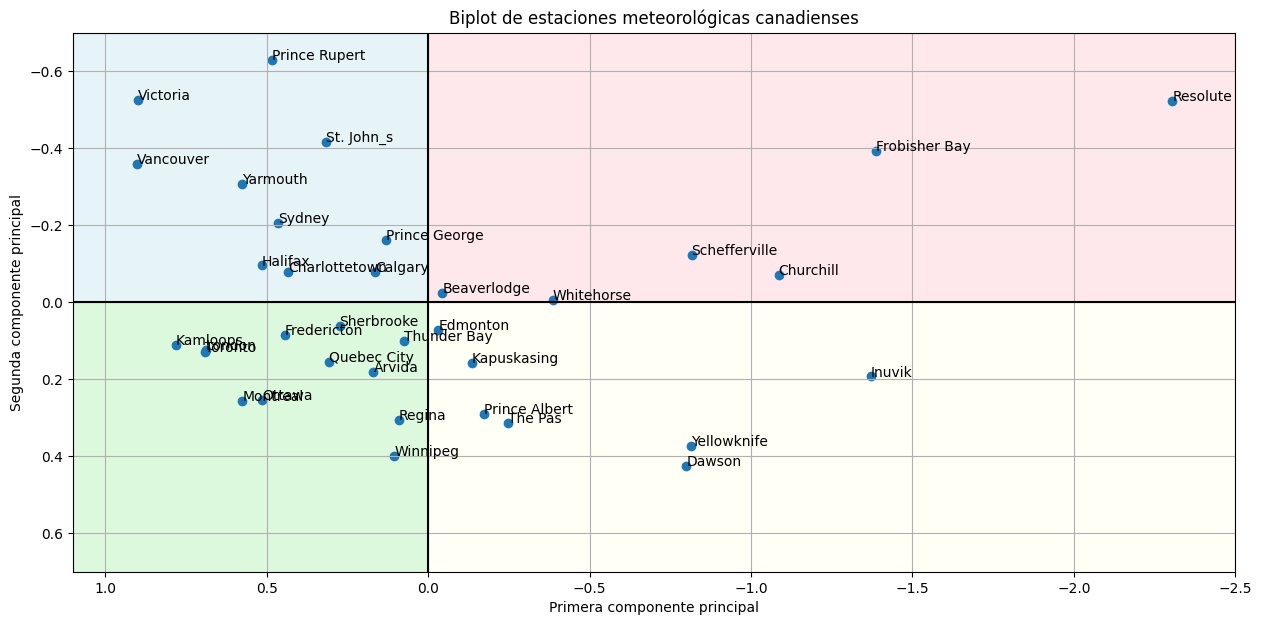

In [ ]:
#Biplot
# Crear la figura
fig, ax = plt.subplots(figsize=(15, 7))

# Definir los límites
xlim = (-2.5, 1.1)
ylim = (-0.7, 0.7)

# Crear los cuadrantes
ax.axvspan(0, xlim[1], ymin=0.5, ymax=1, color='lightblue', alpha=0.3)    # Cuadrante 1
ax.axvspan(xlim[0], 0, ymin=0.5, ymax=1, color='lightpink', alpha=0.3)   # Cuadrante 2
ax.axvspan(xlim[0], 0, ymin=0, ymax=0.5, color='lightyellow', alpha=0.3)    # Cuadrante 3
ax.axvspan(0, xlim[1], ymin=0, ymax=0.5, color='lightgreen', alpha=0.3)  # Cuadrante 4

# Configurar los ejes
ax.axhline(y=0, color='k', linestyle='-')
ax.axvline(x=0, color='k', linestyle='-')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.grid(True)

plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1])
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Biplot de estaciones meteorológicas canadienses')
xlim = (-5, 5)
ylim = (-5, 5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

for i in range(35): plt.annotate(f'{estaciones[i]}', (componentes_principales[i, 0], componentes_principales[i, 1]))
plt.grid(True)
plt.show()

La mayoría de las ciudades más grandes en Canadá se encuentran en los cuadrantes azúl y verde. Relancionados con las condiciones climaticas más favorables en aquel país.